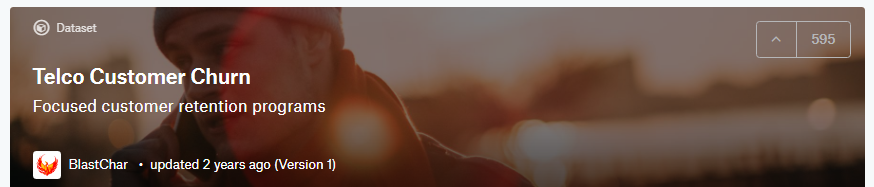

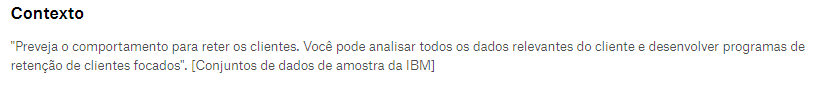

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

In [8]:
import pandas as pd
import plotly.plotly as py
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

# Overview

In [9]:
#Reading
telco = pd.read_csv('../02 - Git_Ignore/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
telco.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [11]:
#Checking for missing values
print ("\nMissing values :  ", telco.isnull().sum().values.sum())


Missing values :   0


In [12]:
#Checking size
telco.shape

(7043, 21)

In [13]:
#Checking formats
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [14]:
#Checking columns
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Exploring/Cleaning

In [15]:
#Checking nunique values
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
#Checking for spaces in object columns (only objetc can have spaces)
for i in telco.select_dtypes(include='object').columns:
    print(telco[i].str.isspace().value_counts())

False    7043
Name: customerID, dtype: int64
False    7043
Name: gender, dtype: int64
False    7043
Name: Partner, dtype: int64
False    7043
Name: Dependents, dtype: int64
False    7043
Name: PhoneService, dtype: int64
False    7043
Name: MultipleLines, dtype: int64
False    7043
Name: InternetService, dtype: int64
False    7043
Name: OnlineSecurity, dtype: int64
False    7043
Name: OnlineBackup, dtype: int64
False    7043
Name: DeviceProtection, dtype: int64
False    7043
Name: TechSupport, dtype: int64
False    7043
Name: StreamingTV, dtype: int64
False    7043
Name: StreamingMovies, dtype: int64
False    7043
Name: Contract, dtype: int64
False    7043
Name: PaperlessBilling, dtype: int64
False    7043
Name: PaymentMethod, dtype: int64
False    7032
True       11
Name: TotalCharges, dtype: int64
False    7043
Name: Churn, dtype: int64


Only 'TotalCharges' as spaces. 

In [17]:
#Replacing eleven spaces with NAN
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
print(telco.isnull().values.any())
print(telco.shape)

True
(7043, 21)


In [18]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Dropind nan rowns
telco.dropna(inplace=True)
print(telco.shape)

(7032, 21)


In [22]:
#Rechecking Total Charges
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

TotalCharges is now type float, floats can't have spaces, so theres no spaces any more. 

In [23]:
#Checking "Multiplelines"
telco['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

'No' is the same as 'No phone service', so we are going to change 'No phone service' to 'No'

In [24]:
#Replacing 'No phone service' to 'No'
telco['MultipleLines'] = telco['MultipleLines'].apply(lambda x:'No' if x == 'No phone service' else x)


In [25]:
#Checking results
telco['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
#CustomerID will not affect our analyze, droping this column
telco.drop('customerID',axis=1,inplace=True)

Gender matter to our analysis?

In [27]:
#Churn per gender - Male
male_churn = telco[telco['gender'] == 'Male']['Churn']
male_churn.value_counts()

No     2619
Yes     930
Name: Churn, dtype: int64

In [28]:
#Churn per gender - Female
female_churn = telco[telco['gender'] == 'Female']['Churn']
female_churn.value_counts()

No     2544
Yes     939
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn - Female')

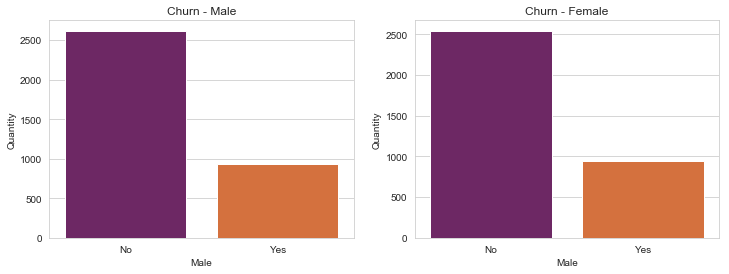

In [29]:
fig,axes = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
plt.sca(axes[0])
sns.set_style('whitegrid')
sns.countplot(x=male_churn,data=telco,palette='inferno')
plt.ylabel('Quantity')
plt.xlabel('Male')
plt.title('Churn - Male')

plt.sca(axes[1])
sns.set_style('whitegrid')
sns.countplot(x=female_churn,data=telco,palette='inferno')
plt.ylabel('Quantity')
plt.xlabel('Male')
plt.title('Churn - Female')

In [30]:
#Genres are very similar, so wu can drop then
telco.drop('gender',axis=1,inplace=True)

Checking any strong correlation between numeric dimensions

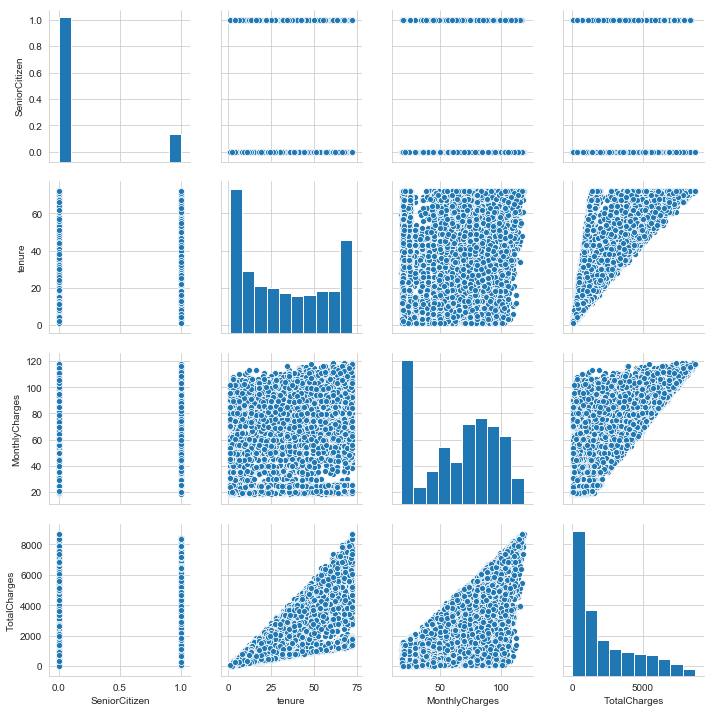

In [31]:
sns.pairplot(telco)

Making bar graph to check if is there any more columns to drop, if they dont have little variation, the we should drop them

In [32]:
#Attempt to create pivottable
telco['count'] = 1

In [33]:
teste = telco.pivot_table(columns='Partner', index='Churn', values='count', aggfunc='count').reset_index()

In [34]:
teste = teste.T.reset_index()

In [35]:
teste

,Partner,0,1
0,Churn,No,Yes
1,No,2439,1200
2,Yes,2724,669


In [36]:
teste.index = ['Churn', 'No', 'Yes']

In [37]:
teste[1:]

,Partner,0,1
No,No,2439,1200
Yes,Yes,2724,669


In [38]:
#Function to create chart_bar
def chart_bar(col, data=telco, churn='Churn', count='count'):
    pivot = data.pivot_table(columns=col, index=churn, values=count, aggfunc='count').reset_index()
    pivot = pivot.T.reset_index()
    pivot[1:].plot(kind='bar',figsize = (12,4))
    plt.title(col)
    return(plt.show);

In [39]:
cols_object = list(telco.select_dtypes(include='object').columns)

In [40]:
#Removing Churn
cols_object.remove('Churn')

Making bar graph to check if is there any more columns to drop, we will do this by analyzing the categories of each column vs column Churn.
If the categories vary slightly then this column is not influencing the Churn column.

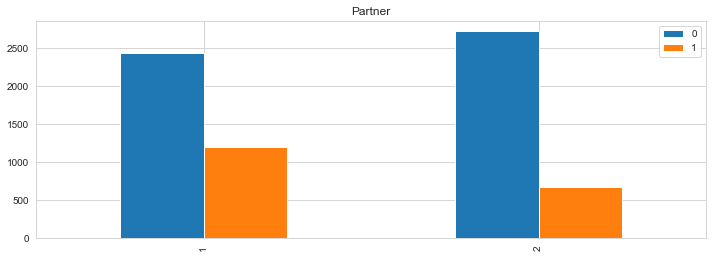

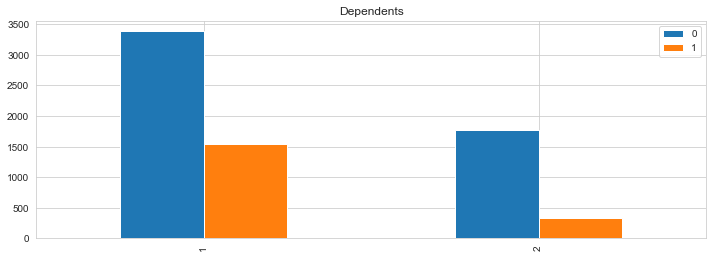

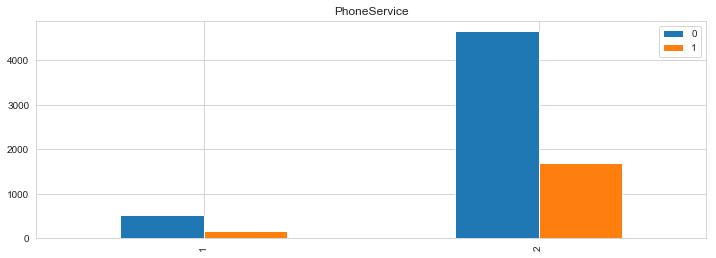

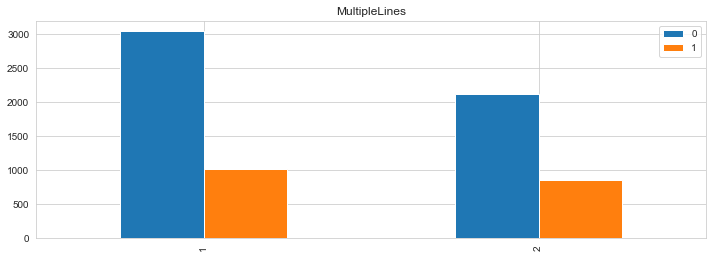

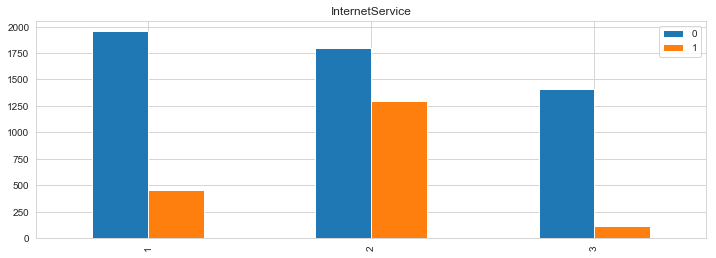

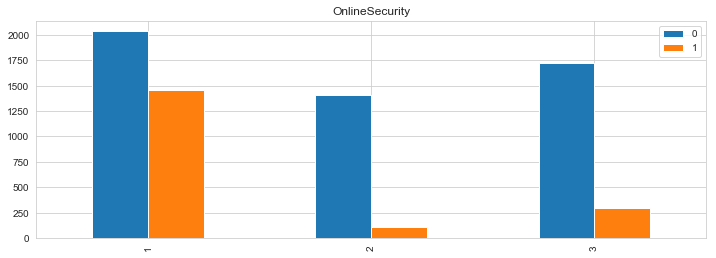

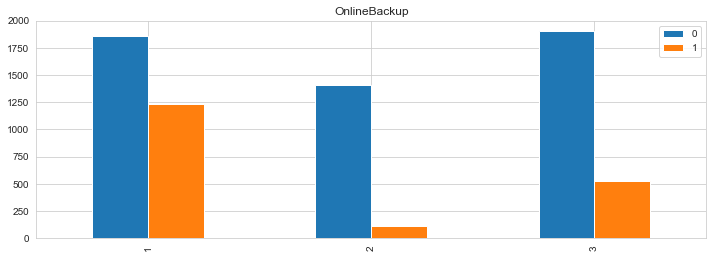

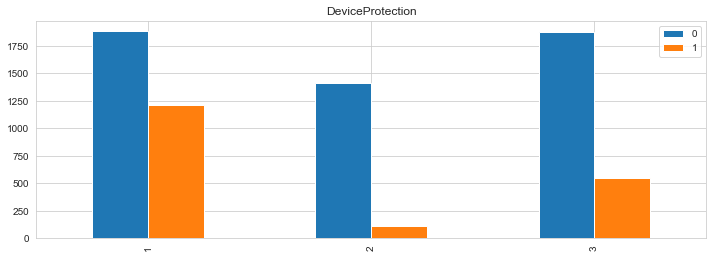

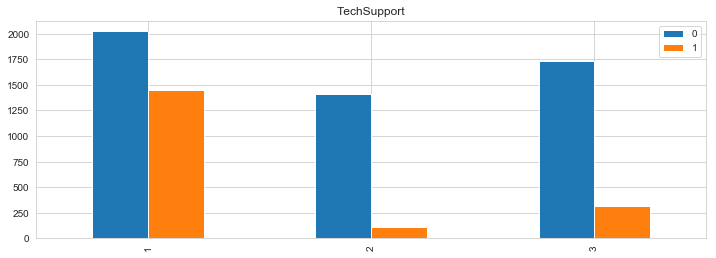

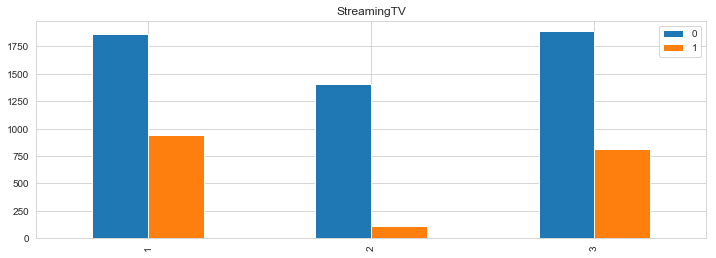

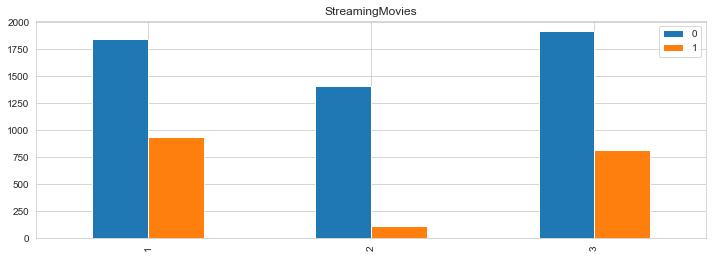

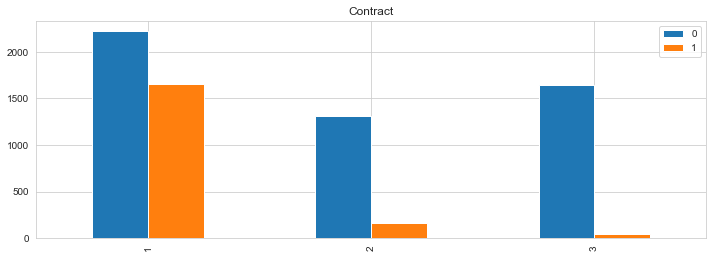

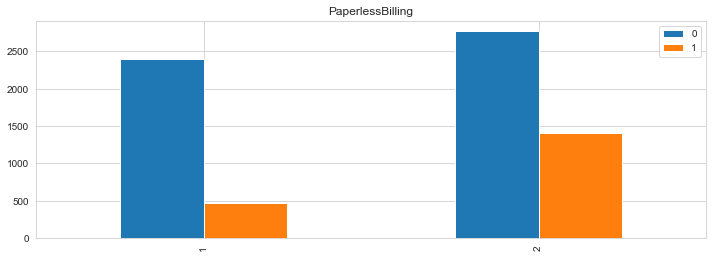

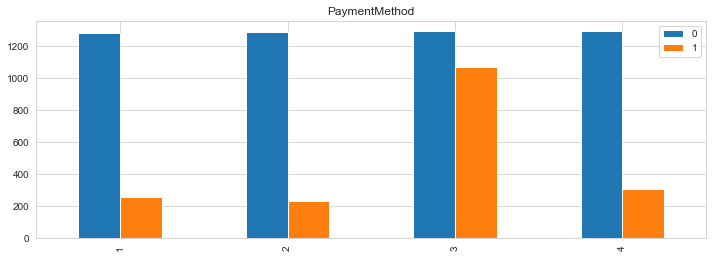

In [41]:
for i in cols_object:
    #print(i, chart_bar(i))
    chart_bar(i)

We are gone use all object columns in this first test, since all columns vary by category.

In [42]:
#Creating Variable for objects types
telco_object = telco.select_dtypes(include='object')

In [43]:
#Creating Variable for float types
telco_float = telco.select_dtypes(include='float64')

In [44]:
#Creating Variable for integers types
telco_int = telco.select_dtypes(include='int64')

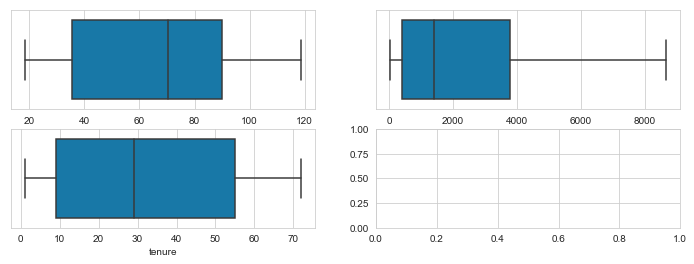

In [45]:
#Checking numeric dimensions (possible outliers)
fig,axes = plt.subplots(figsize = (12,4),nrows = 2, ncols = 2)
plt.sca(axes[0,0])
sns.set_style('whitegrid')
sns.boxplot(x=telco.MonthlyCharges, data=telco, palette='winter')

plt.sca(axes[0,1])
sns.set_style('whitegrid')
sns.boxplot(x=telco.TotalCharges, data=telco, palette='winter')

plt.sca(axes[1,0])
sns.set_style('whitegrid')
sns.boxplot(x=telco.tenure, data=telco, palette='winter')


# Pre Analysis

In [38]:
#Studing ternure 
telco.tenure.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [39]:
telco.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

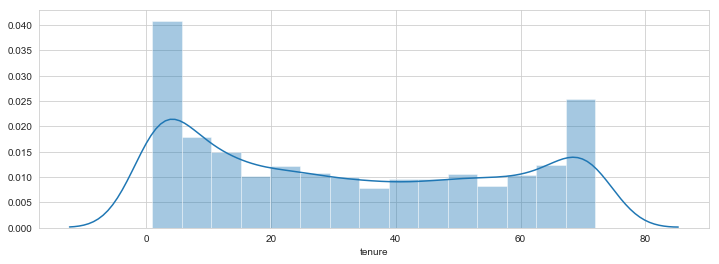

In [40]:
#Number of months the customer has stayed with the company
plt.figure(figsize=(12,4))
sns.distplot(telco['tenure']);

##### This particularity of tenure will be further studied in Projeto_Final_Parte_02

# Preparing df for logistic regression

Preparing categorical values with get_dummies

In [41]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
count               7032 non-null int64
dtypes: float64(2), int64(3), object(15)
memory usage: 1.4+ MB


In [46]:
#Creating list of dimensions for get_dummies
list_for_dummies = telco_object.drop('Churn',axis=1)

In [47]:
dummies_telco = pd.get_dummies(list_for_dummies,drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
dummies_telco.head(2)

,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
#Transform Churn
telco['MultipleLines'] = telco['MultipleLines'].apply(lambda x:'No' if x == 'No phone service' else x)

telco['Churn'] = telco['Churn'].apply(lambda x:1 if x == 'Yes' else 0)



In [49]:
numbers_for_logistic = telco[['MonthlyCharges','TotalCharges','SeniorCitizen','tenure']]
numbers_for_logistic.shape

(7032, 4)

In [50]:
train = pd.concat([numbers_for_logistic,dummies_telco,telco['Churn'] ],axis=1)
train.head(1)



,MonthlyCharges,TotalCharges,SeniorCitizen,tenure,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,29.85,29.85,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## Logistic Regression

In [51]:
#Dividing train and test model
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Churn',axis=1),     #Train dimensions
                                                    train['Churn'], test_size=0.30, #Target dimension
                                                    random_state=32)

In [53]:
#Training and Prediction
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predictions_log = logmodel.predict(X_test)

## Evaluation

In [56]:
from sklearn.metrics import classification_report

In [57]:
auc_mean_log = []
auc_mean_log.append(roc_auc_score(y_test, predictions_log))

print(classification_report(y_test,predictions_log))

#print(classification_report(y_test,predictions_log))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1535
           1       0.68      0.56      0.61       575

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



## Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
predictions_tree = dtree.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
auc_mean_boost = []
auc_mean_boost.append(roc_auc_score(y_test, predictions_tree))

print(classification_report(y_test,predictions_boost))

NameError: name 'predictions_boost' is not defined

## XGBoost

In [64]:
model = XGBClassifier()

model.fit(X_train, y_train)

predictions_boost = model.predict(X_test)

auc_mean_boost = []
auc_mean_boost.append(roc_auc_score(y_test, predictions_boost))

print(classification_report(y_test,predictions_boost))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1535
           1       0.68      0.51      0.59       575

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.27
R2 no set de teste: 0.30


In [69]:
print(lm.intercept_)

0.46058161008747417


In [70]:
coeff_df = pd.DataFrame(lm.coef_,train.drop('Churn',axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
MonthlyCharges,-0.003090
TotalCharges,-0.000042
SeniorCitizen,0.036092
tenure,-0.001959
Partner_Yes,-0.006307
Dependents_Yes,-0.017123
PhoneService_Yes,0.038663
MultipleLines_Yes,0.073111
InternetService_Fiber optic,0.239793
InternetService_No,-0.031923


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [73]:

def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [75]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telco.nunique()[telco.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telco.columns if x not in cat_cols + target_col + Id_col]

In [76]:
cols    = [i for i in telco.columns if i not in Id_col+target_col]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1535
           1       0.68      0.56      0.61       575

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

Accuracy   Score :  0.809478672985782
Area under curve :  0.7309219657272341 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



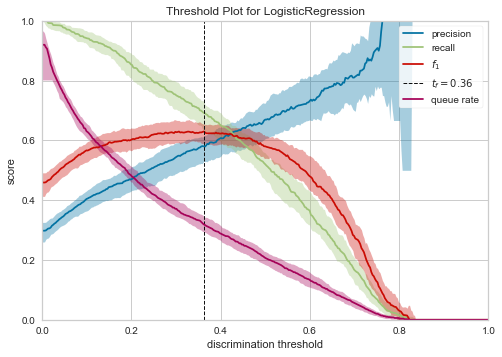

In [77]:
telecom_churn_prediction(logit,X_train, X_test, y_train, y_test,
                         cols,"coefficients",threshold_plot = True)

#### The end =)